In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Level 1
## Task 1
### Task: Top Cuisines
1. Determine the top three most common cuisines in the dataset.
2. Calculate the percentage of restaurants that serve each of the top cuisines.


In [2]:
df = pd.read_csv("Dataset .csv")
pd.set_option('display.max_columns',21)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.shape

(9551, 21)

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


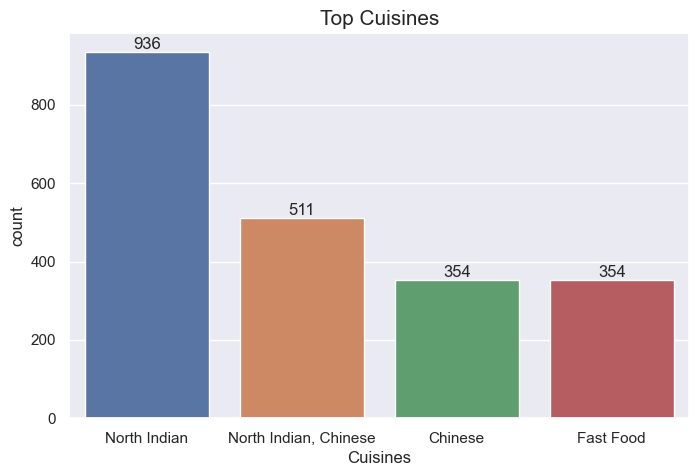

In [8]:
top_cuisines = df.groupby("Cuisines").size().reset_index().rename(columns={0:'count'}).sort_values("count",ascending=False).head(4)
sns.set(rc={'figure.figsize':(8,5)})
x = sns.barplot(x="Cuisines",y="count",data=top_cuisines)
for bars in x.containers:
    x.bar_label(bars)
plt.title("Top Cuisines",fontsize=15)
plt.show()

### From the visualization we can conclude that top cuisines are 
1. North Indian
2. North Indian and Chinese
3. Chinese and Fast Food together with same count.

In [9]:
top_cuisine_rest = df[df['Cuisines']=='North Indian'].groupby("Restaurant Name").size().reset_index().rename(columns={0:'count'}).sort_values("count",ascending=False).count()
per_top_1 = top_cuisine_rest['count']/df.shape[0]
per_top_1.round(3)

0.091

#### So only 0.091% restraunts serve "North Indian" Cuisine

In [10]:
top_cuisine_rest = df[df['Cuisines']=='North Indian, Chinese'].groupby("Restaurant Name").size().reset_index().rename(columns={0:'count'}).sort_values("count",ascending=False).count()
per_top_2= top_cuisine_rest['count']/df.shape[0]
per_top_2.round(3)

0.049

#### So only 0.049% restraunts serve North Indian, Chinese Cuisine

In [11]:
top_cuisine_rest = df[df['Cuisines']=='Chinese'].groupby("Restaurant Name").size().reset_index().rename(columns={0:'count'}).sort_values("count",ascending=False).count()
per_top_3= top_cuisine_rest['count']/df.shape[0]
per_top_3.round(3)

0.032

#### So only 0.032% restraunts serve  Chinese Cuisine

 ## Task2 : City Analysis
1. Identify the city with the highest number of restaurants in the dataset.
2. Calculate the average rating for restaurants in each city.
3. Determine the city with the highest average rating

In [12]:
df.columns = df.columns.str.lower()
df.head()

,restaurant id,restaurant name,country code,city,address,locality,locality verbose,longitude,latitude,cuisines,average cost for two,currency,has table booking,has online delivery,is delivering now,switch to order menu,price range,aggregate rating,rating color,rating text,votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [13]:
df.groupby('city')['restaurant name'].size().reset_index().rename(columns={'restaurant name':'total_restaurant'}).sort_values("total_restaurant",ascending=False).head(1)

,city,total_restaurant
88,New Delhi,5473


### So New Delhi is the City with maximum 5473 restaurants in the dataset

In [14]:
avg_ratings = df.groupby('city',as_index=False).agg({'aggregate rating': 'mean'})
avg_ratings.head(10)

,city,aggregate rating
0,Abu Dhabi,4.300000
1,Agra,3.965000
2,Ahmedabad,4.161905
3,Albany,3.555000
4,Allahabad,3.395000
5,Amritsar,3.685714
6,Ankara,4.305000
7,Armidale,3.500000
8,Athens,4.200000
9,Auckland,4.275000


In [15]:
top_avg_rating  = avg_ratings.sort_values('aggregate rating',ascending=False).head(1)
top_avg_rating

,city,aggregate rating
56,Inner City,4.9


# Task3 : Price Range Distribution
1. Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
2. Calculate the percentage of restaurants in each price range category.

In [16]:
rest_price_range = df.groupby('restaurant name',as_index=False).agg({'price range': 'mean'}).sort_values("price range",ascending=False)
price_range_counts = rest_price_range['price range'].value_counts()
price_range_percentage = ((price_range_counts / price_range_counts.sum()) * 100).reset_index().rename(columns={"index":"price_range","price range":"percentage"}).sort_values(by='price_range')
price_range_percentage['price_range'] = price_range_percentage['price_range'].astype("int")
price_range_percentage = price_range_percentage.groupby('price_range',as_index=False).sum().reset_index()
price_range_percentage

,index,price_range,percentage
0,0,1,47.367714
1,1,2,30.083266
2,2,3,15.525114
3,3,4,7.023905


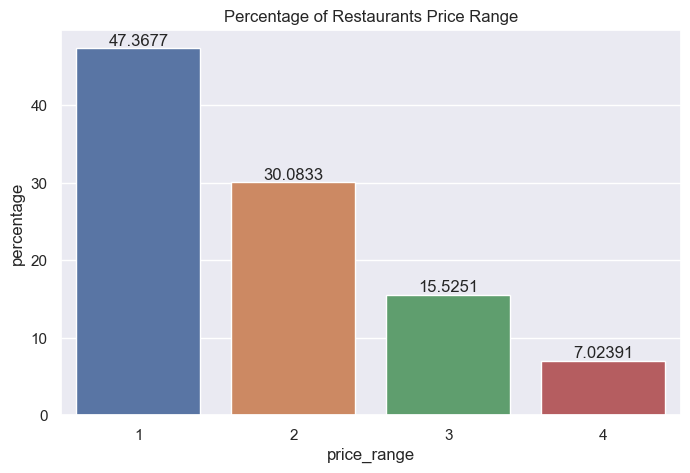

In [17]:
x= sns.barplot(x= price_range_percentage['price_range'],y= price_range_percentage['percentage'])
for bars in x.containers:
    x.bar_label(bars)
plt.title("Percentage of Restaurants Price Range")
plt.show()

## Task4: Online Delivery
1. Determine the percentage of restaurants that offer online delivery.
2. Compare the average ratings of restaurants with and without online delivery.

In [18]:
df.head(1)

,restaurant id,restaurant name,country code,city,address,locality,locality verbose,longitude,latitude,cuisines,average cost for two,currency,has table booking,has online delivery,is delivering now,switch to order menu,price range,aggregate rating,rating color,rating text,votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [19]:
online_delivery =  df[df['has online delivery']== 'Yes'].value_counts().reset_index()
online_delivery_count = df[df['has online delivery']== 'Yes'].value_counts().sum()
online_delivery_percetage  = online_delivery_count/df.value_counts().sum()*100
online_delivery_percetage.round(2)

25.69

### So from dataset only 25.69% of the restaurants accept onlinne delivery

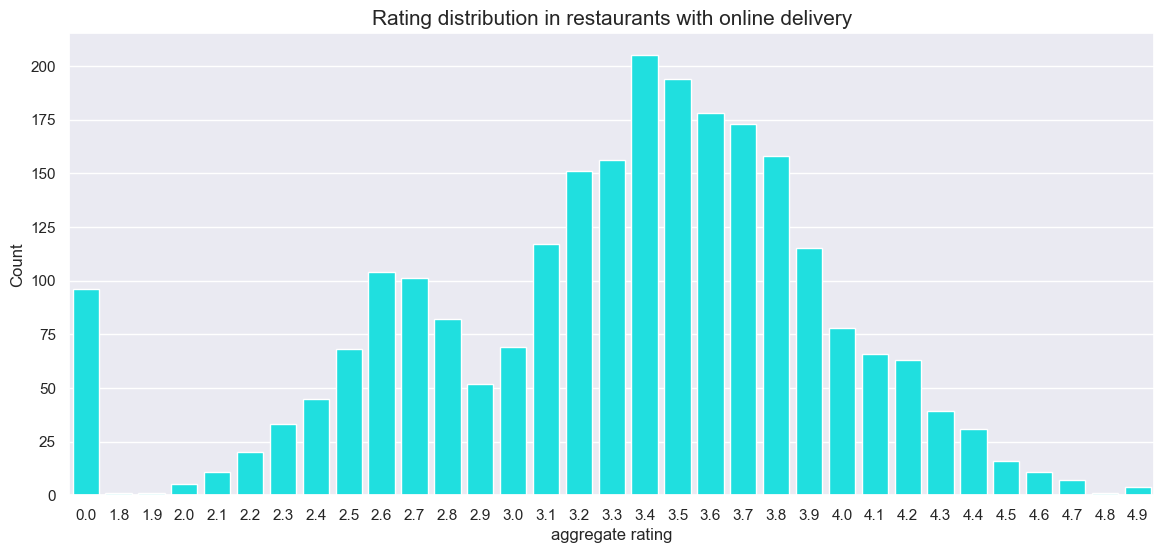

In [20]:
online_delivery = df[df['has online delivery'] == 'Yes']
restaurant_ratings = online_delivery.groupby('restaurant name', as_index=False).agg({'aggregate rating': 'mean'}).sort_values('aggregate rating', ascending=False)
rating_counts = online_delivery['aggregate rating'].value_counts().reset_index()
rating_counts.columns = ['aggregate rating', 'Count']
rating_counts
plt.figure(figsize=(14, 6))
sns.barplot(x='aggregate rating', y='Count', data=rating_counts, color='cyan')
plt.title("Rating distribution in restaurants with online delivery",fontsize=15)
plt.show()

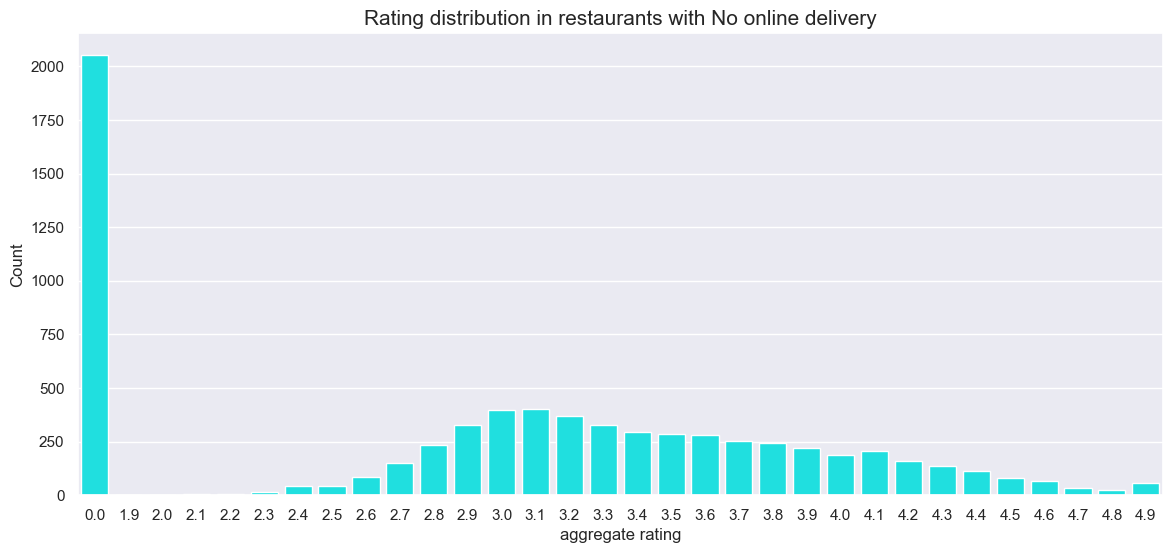

In [21]:
no_online_delivery = df[df['has online delivery'] == 'No']
restaurant_ratings = no_online_delivery.groupby('restaurant name', as_index=False).agg({'aggregate rating': 'mean'}).sort_values('aggregate rating', ascending=False)
rating_counts = no_online_delivery['aggregate rating'].value_counts().reset_index()
rating_counts.columns = ['aggregate rating', 'Count']
rating_counts
plt.figure(figsize=(14, 6))
sns.barplot(x='aggregate rating', y='Count', data=rating_counts, color='cyan')
plt.title("Rating distribution in restaurants with No online delivery",fontsize=15)
plt.show()

### So from these plots we can conclude that 
1. Restaurants with online delivery are rated mostly between 3.2 to 3.8 with some spikes at 2.6,2.7 and at 0.
2. Restaurants with No online delivery are rated mostly between 2.8 to 4.0 with a huge spike at 0 